# EDA and Cleaning

This notebook will cover Data Importing, Data Cleaning, and the EDA portion of this project.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os  

In [3]:
df = pd.read_csv('../data/inputs/train.csv')

/var/folders/46/7m_77fzd11d4p2vjr6j6rtk40000gn/T/ipykernel_63739/3718364399.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/inputs/train.csv')


## Checking for Duplicated Columns / Rows

In [4]:
len(df.columns) == len(set(df.columns)) # If it is true it means there are no columns with duplicated names, if it is False, there are columns with the same names

True

In [ ]:
df[df.duplicated()]

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


There are no duplicated rows. The duplicated function checks if the values of all the columns of a certain row matches another row exactly.

In this case, there are no duplicated rows.

## Checking Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

Let's first check to see if there are any missing values in the dataset.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Hawker_Within_500m    97390
Mall_Within_500m      92789
Hawker_Within_1km     60868
Hawker_Within_2km     29202
Mall_Within_1km       25426
                      ...  
market_hawker             0
commercial                0
residential               0
year_completed            0
sec_sch_longitude         0
Length: 77, dtype: int64

There are missing values, let's filter them out and have the missing values as a percentage against the total number of rows.

In [ ]:
def percent_missing(df):
    # getting %nulls for cols with missing values
    missing_df = pd.DataFrame(df.isna().sum()).reset_index()
    missing_df.columns = ['col', 'num_nulls'] # updating all col names in missing_df
    missing_df['%nulls'] = missing_df['num_nulls']*100/len(df)#creating a new col for %nulls (num_nulls/df_len)
    return missing_df[missing_df['num_nulls']>0] # filter to only cols with any nulls

In [ ]:
percent_missing(df)

,col,num_nulls,%nulls
45,Mall_Nearest_Distance,829,0.550341
46,Mall_Within_500m,92789,61.598975
47,Mall_Within_1km,25426,16.879323
48,Mall_Within_2km,1940,1.287890
50,Hawker_Within_500m,97390,64.653398
51,Hawker_Within_1km,60868,40.407876
52,Hawker_Within_2km,29202,19.386062


There are 7 features with missing values, I will need to check them all. Starting with the columns related to mall distance

In [ ]:
df[(df['Mall_Within_1km'].isnull()) & ((df['Mall_Nearest_Distance'] < 1000) | df['Mall_Nearest_Distance'].isnull())][['block','town','street_name','Mall_Nearest_Distance','Mall_Within_1km']]

,block,town,street_name,Mall_Nearest_Distance,Mall_Within_1km
75,468A,SENGKANG,FERNVALE LINK,NaN,NaN
321,815C,CHOA CHU KANG,CHOA CHU KANG AVE 7,NaN,NaN
478,18B,GEYLANG,CIRCUIT RD,NaN,NaN
643,122A,PUNGGOL,EDGEDALE PLAINS,NaN,NaN
691,440A,CLEMENTI,CLEMENTI AVE 3,NaN,NaN
...,...,...,...,...,...
150296,315A,PUNGGOL,PUNGGOL WAY,NaN,NaN
150388,676C,PUNGGOL,PUNGGOL DR,NaN,NaN
150394,678A,PUNGGOL,PUNGGOL DR,NaN,NaN
150479,677B,PUNGGOL,PUNGGOL DR,NaN,NaN


In [ ]:
df[(df['Mall_Within_1km'].isnull()) & ((df['Mall_Nearest_Distance'] < 1000) | df['Mall_Nearest_Distance'].isnull())]['Mall_Nearest_Distance'].unique()

array([nan])

Checking if there are any rows which list the mall nearest distance as less than 1000 mteres, as if there is any, that means that the NaN values are not representing 0 but rather that something went wrong in the data recording process.

In this case, there are no rows which mall_within_1km is null and mall_nearest_distance is less than 1000, which means that the NaN values are all highly likely to represent 0.

In [ ]:
df[(df['Mall_Within_1km'].isnull()) & ((df['Mall_Nearest_Distance'] > 1000) | df['Mall_Nearest_Distance'].isnull())][['block','town','street_name','Mall_Nearest_Distance','Mall_Within_1km']]

,block,town,street_name,Mall_Nearest_Distance,Mall_Within_1km
0,3B,KALLANG/WHAMPOA,UPP BOON KENG RD,1094.090418,NaN
2,289B,BUKIT BATOK,BT BATOK ST 25,1459.579948,NaN
7,701,BEDOK,BEDOK RESERVOIR RD,1749.147519,NaN
27,291A,BUKIT BATOK,BT BATOK ST 24,1063.974768,NaN
35,64,KALLANG/WHAMPOA,KALLANG BAHRU,1211.930580,NaN
...,...,...,...,...,...
150606,59,BEDOK,CHAI CHEE RD,1019.573002,NaN
150613,142,BUKIT MERAH,JLN BT MERAH,1051.126583,NaN
150625,676B,PUNGGOL,PUNGGOL DR,NaN,NaN
150626,60,BUKIT MERAH,TELOK BLANGAH HTS,1216.129901,NaN


More evidence can be found when we do the opposite and filter above 1000 metres. We can see all null values have a mall_nearest_distance at least 1000 metres away. Hence, the null values should be 0 and not null.

In [ ]:
df['Mall_Within_1km'] = df['Mall_Within_1km'].fillna(0)

As i'm filling the missing values with a constant value of 0, it doesn't really matter whether I do it before the train test split as I'm not introducting any bias. Will fill the missing values now.

In [ ]:
df[(df['Mall_Within_2km'].isnull()) & ((df['Mall_Nearest_Distance'] < 2000) | df['Mall_Nearest_Distance'].isnull())][['block','town','street_name','Mall_Nearest_Distance','Mall_Within_2km']]

,block,town,street_name,Mall_Nearest_Distance,Mall_Within_2km
75,468A,SENGKANG,FERNVALE LINK,NaN,NaN
321,815C,CHOA CHU KANG,CHOA CHU KANG AVE 7,NaN,NaN
478,18B,GEYLANG,CIRCUIT RD,NaN,NaN
643,122A,PUNGGOL,EDGEDALE PLAINS,NaN,NaN
691,440A,CLEMENTI,CLEMENTI AVE 3,NaN,NaN
...,...,...,...,...,...
150296,315A,PUNGGOL,PUNGGOL WAY,NaN,NaN
150388,676C,PUNGGOL,PUNGGOL DR,NaN,NaN
150394,678A,PUNGGOL,PUNGGOL DR,NaN,NaN
150479,677B,PUNGGOL,PUNGGOL DR,NaN,NaN


In [ ]:
df[(df['Mall_Within_2km'].isnull()) & ((df['Mall_Nearest_Distance'] > 2000) | df['Mall_Nearest_Distance'].isnull())][['block','town','street_name','Mall_Nearest_Distance','Mall_Within_2km']]

,block,town,street_name,Mall_Nearest_Distance,Mall_Within_2km
75,468A,SENGKANG,FERNVALE LINK,NaN,NaN
109,601,BEDOK,BEDOK RESERVOIR RD,2050.201309,NaN
220,123,BEDOK,BEDOK RESERVOIR RD,2247.327448,NaN
321,815C,CHOA CHU KANG,CHOA CHU KANG AVE 7,NaN,NaN
478,18B,GEYLANG,CIRCUIT RD,NaN,NaN
...,...,...,...,...,...
150337,120,BEDOK,BEDOK RESERVOIR RD,2147.296706,NaN
150388,676C,PUNGGOL,PUNGGOL DR,NaN,NaN
150394,678A,PUNGGOL,PUNGGOL DR,NaN,NaN
150479,677B,PUNGGOL,PUNGGOL DR,NaN,NaN


Similarly for Mall_Within_2km column, the same is true. The null values are because the nearest mall is more than 2km away. The null values should be 0 instead.

In [ ]:
df['Mall_Within_2km'] = df['Mall_Within_2km'].fillna(0)

In [ ]:
df[(df['Mall_Within_500m'].isnull()) & ((df['Mall_Nearest_Distance'] < 500) | df['Mall_Nearest_Distance'].isnull())][['block','town','street_name','Mall_Nearest_Distance','Mall_Within_500m']]

,block,town,street_name,Mall_Nearest_Distance,Mall_Within_500m
75,468A,SENGKANG,FERNVALE LINK,NaN,NaN
321,815C,CHOA CHU KANG,CHOA CHU KANG AVE 7,NaN,NaN
478,18B,GEYLANG,CIRCUIT RD,NaN,NaN
643,122A,PUNGGOL,EDGEDALE PLAINS,NaN,NaN
691,440A,CLEMENTI,CLEMENTI AVE 3,NaN,NaN
...,...,...,...,...,...
150296,315A,PUNGGOL,PUNGGOL WAY,NaN,NaN
150388,676C,PUNGGOL,PUNGGOL DR,NaN,NaN
150394,678A,PUNGGOL,PUNGGOL DR,NaN,NaN
150479,677B,PUNGGOL,PUNGGOL DR,NaN,NaN


In [ ]:
df[(df['Mall_Within_500m'].isnull()) & ((df['Mall_Nearest_Distance'] > 500) | df['Mall_Nearest_Distance'].isnull())][['block','town','street_name','Mall_Nearest_Distance','Mall_Within_500m']]


,block,town,street_name,Mall_Nearest_Distance,Mall_Within_500m
0,3B,KALLANG/WHAMPOA,UPP BOON KENG RD,1094.090418,NaN
1,153,BISHAN,BISHAN ST 13,866.941448,NaN
2,289B,BUKIT BATOK,BT BATOK ST 25,1459.579948,NaN
3,232,BISHAN,BISHAN ST 22,950.175199,NaN
4,876,YISHUN,YISHUN ST 81,729.771895,NaN
...,...,...,...,...,...
150626,60,BUKIT MERAH,TELOK BLANGAH HTS,1216.129901,NaN
150628,469C,SENGKANG,SENGKANG WEST WAY,565.636046,NaN
150629,849,WOODLANDS,WOODLANDS ST 82,585.138715,NaN
150631,639,BEDOK,BEDOK RESERVOIR RD,1790.053482,NaN


Same thing applies for mall_within_500m, values should be 0.

In [ ]:
df['Mall_Within_500m'] = df['Mall_Within_500m'].fillna(0)

In [ ]:
percent_missing(df)

,col,num_nulls,%nulls
45,Mall_Nearest_Distance,829,0.550341
50,Hawker_Within_500m,97390,64.653398
51,Hawker_Within_1km,60868,40.407876
52,Hawker_Within_2km,29202,19.386062


Now to check if the same is true for the hawker columns.

In [ ]:
df[(df['Hawker_Within_1km'].isnull()) & ((df['Hawker_Nearest_Distance'] < 1000) | df['Hawker_Nearest_Distance'].isnull())][['block','town','street_name','Hawker_Nearest_Distance','Hawker_Within_1km']]

,block,town,street_name,Hawker_Nearest_Distance,Hawker_Within_1km


In [ ]:
df[(df['Hawker_Within_1km'].isnull()) & ((df['Hawker_Nearest_Distance'] > 1000) | df['Hawker_Nearest_Distance'].isnull())][['block','town','street_name','Hawker_Nearest_Distance','Hawker_Within_1km']]

,block,town,street_name,Hawker_Nearest_Distance,Hawker_Within_1km
2,289B,BUKIT BATOK,BT BATOK ST 25,1762.082341,NaN
4,876,YISHUN,YISHUN ST 81,1540.151439,NaN
8,450,BISHAN,SIN MING AVE,1032.848455,NaN
9,307D,SENGKANG,ANCHORVALE RD,1743.704293,NaN
10,273D,SENGKANG,COMPASSVALE LINK,1634.750527,NaN
...,...,...,...,...,...
150625,676B,PUNGGOL,PUNGGOL DR,4491.675680,NaN
150627,359A,SEMBAWANG,ADMIRALTY DR,1957.044643,NaN
150628,469C,SENGKANG,SENGKANG WEST WAY,2443.370839,NaN
150630,648D,JURONG WEST,JURONG WEST ST 61,1807.769865,NaN


As expected, the null values represent 0 as no hawker centres are within 1km.

In [ ]:
df['Hawker_Within_1km'] = df['Hawker_Within_1km'].fillna(0)

In [ ]:
df[(df['Hawker_Within_2km'].isnull()) & ((df['Hawker_Nearest_Distance'] < 2000) | df['Hawker_Nearest_Distance'].isnull())][['block','town','street_name','Hawker_Nearest_Distance','Hawker_Within_2km']]

,block,town,street_name,Hawker_Nearest_Distance,Hawker_Within_2km


In [ ]:
df[(df['Hawker_Within_2km'].isnull()) & ((df['Hawker_Nearest_Distance'] > 2000) | df['Hawker_Nearest_Distance'].isnull())][['block','town','street_name','Hawker_Nearest_Distance','Hawker_Within_2km']]

,block,town,street_name,Hawker_Nearest_Distance,Hawker_Within_2km
26,653A,JURONG WEST,JURONG WEST ST 61,2028.864896,NaN
27,291A,BUKIT BATOK,BT BATOK ST 24,2044.044484,NaN
30,417,CHOA CHU KANG,CHOA CHU KANG AVE 4,3472.690804,NaN
31,507C,SEMBAWANG,WELLINGTON CIRCLE,2278.363660,NaN
33,299B,SENGKANG,COMPASSVALE ST,3159.026726,NaN
...,...,...,...,...,...
150615,667A,PUNGGOL,PUNGGOL DR,4612.654746,NaN
150620,175D,PUNGGOL,PUNGGOL FIELD,3794.986446,NaN
150623,260C,SENGKANG,SENGKANG EAST WAY,2537.537184,NaN
150625,676B,PUNGGOL,PUNGGOL DR,4491.675680,NaN


Same thing as hawker_within_1km, all null values should be 0 instead.

In [ ]:
df['Hawker_Within_2km'] = df['Hawker_Within_2km'].fillna(0)

In [ ]:
df[(df['Hawker_Within_500m'].isnull()) & ((df['Hawker_Nearest_Distance'] < 500) | df['Hawker_Nearest_Distance'].isnull())][['block','town','street_name','Hawker_Nearest_Distance','Hawker_Within_500m']]

,block,town,street_name,Hawker_Nearest_Distance,Hawker_Within_500m


In [ ]:
df[(df['Hawker_Within_500m'].isnull()) & ((df['Hawker_Nearest_Distance'] > 500) | df['Hawker_Nearest_Distance'].isnull())][['block','town','street_name','Hawker_Nearest_Distance','Hawker_Within_500m']]

,block,town,street_name,Hawker_Nearest_Distance,Hawker_Within_500m
1,153,BISHAN,BISHAN ST 13,640.151925,NaN
2,289B,BUKIT BATOK,BT BATOK ST 25,1762.082341,NaN
3,232,BISHAN,BISHAN ST 22,726.215262,NaN
4,876,YISHUN,YISHUN ST 81,1540.151439,NaN
6,641,HOUGANG,HOUGANG AVE 8,516.981824,NaN
...,...,...,...,...,...
150628,469C,SENGKANG,SENGKANG WEST WAY,2443.370839,NaN
150629,849,WOODLANDS,WOODLANDS ST 82,973.725973,NaN
150630,648D,JURONG WEST,JURONG WEST ST 61,1807.769865,NaN
150631,639,BEDOK,BEDOK RESERVOIR RD,1076.260436,NaN


As expected, the NaN values are because there are no hawker centres within 500m. The NaN values should be 0 instead.

In [ ]:
df['Hawker_Within_500m'] = df['Hawker_Within_500m'].fillna(0)

In [ ]:
percent_missing(df)

,col,num_nulls,%nulls
45,Mall_Nearest_Distance,829,0.550341


We are now left with one column with missing values.

In [ ]:
df[df['Mall_Nearest_Distance'].isnull()]

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
75,163384,2021-04,SENGKANG,4 ROOM,468A,FERNVALE LINK,19 TO 21,93.0,Model A,2016,...,83,0,1.397621,103.880210,789.399776,Pei Hwa Secondary School,219,0,1.390380,103.878593
321,163733,2021-03,CHOA CHU KANG,4 ROOM,815C,CHOA CHU KANG AVE 7,19 TO 21,93.0,Model A,2017,...,38,0,1.381767,103.747290,926.560287,Chua Chu Kang Secondary School,211,0,1.383275,103.752025
478,68334,2021-02,GEYLANG,3 ROOM,18B,CIRCUIT RD,01 TO 03,67.0,Model A,2016,...,47,1,1.326511,103.881757,1366.262344,Bartley Secondary School,188,0,1.340017,103.882455
643,68382,2021-02,PUNGGOL,4 ROOM,122A,EDGEDALE PLAINS,10 TO 12,93.0,Model A,2017,...,93,1,1.394854,103.908573,501.165620,Greendale Secondary School,203,0,1.397281,103.911576
691,68193,2020-12,CLEMENTI,3 ROOM,440A,CLEMENTI AVE 3,10 TO 12,69.0,Model A,2018,...,75,0,1.315809,103.763055,241.034822,Clementi Town Secondary School,231,0,1.315475,103.762079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150296,68302,2021-01,PUNGGOL,3 ROOM,315A,PUNGGOL WAY,13 TO 15,68.0,Premium Apartment,2017,...,110,0,1.406871,103.898911,1067.082939,Edgefield Secondary School,226,0,1.400179,103.902141
150388,163799,2021-02,PUNGGOL,5 ROOM,676C,PUNGGOL DR,13 TO 15,113.0,Premium Apartment,2016,...,57,0,1.404409,103.910996,391.955268,Punggol Secondary School,194,0,1.402126,103.909119
150394,163287,2021-01,PUNGGOL,4 ROOM,678A,PUNGGOL DR,10 TO 12,93.0,Premium Apartment,2016,...,57,0,1.404409,103.910996,395.677442,Punggol Secondary School,194,0,1.402126,103.909119
150479,163674,2021-04,PUNGGOL,4 ROOM,677B,PUNGGOL DR,13 TO 15,93.0,Premium Apartment,2016,...,57,0,1.404409,103.910996,362.688469,Punggol Secondary School,194,0,1.402126,103.909119


Looking at the null values for the Mall_Nearest_Distance column, we can either remove the rows at is only 0.55% of the entire dataset, but I think imputing the missing values with the median value of the feature makes sense.

Knowing this, I will impute the missing values after my train test split to avoid data leakage.

## Checking Categorical Columns

In [ ]:
df_objs = df.select_dtypes(include='object')

* Identifying categorical columns, to either remove or dummify them.

In [ ]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Tranc_YearMonth      150634 non-null  object
 1   town                 150634 non-null  object
 2   flat_type            150634 non-null  object
 3   block                150634 non-null  object
 4   street_name          150634 non-null  object
 5   storey_range         150634 non-null  object
 6   flat_model           150634 non-null  object
 7   full_flat_type       150634 non-null  object
 8   address              150634 non-null  object
 9   residential          150634 non-null  object
 10  commercial           150634 non-null  object
 11  market_hawker        150634 non-null  object
 12  multistorey_carpark  150634 non-null  object
 13  precinct_pavilion    150634 non-null  object
 14  postal               150634 non-null  object
 15  planning_area        150634 non-nu

In [ ]:
def unique(column_name):
    return df[column_name].unique()

Creating a function to make checking unique values of each column quicker.

In [ ]:
unique('Tranc_YearMonth')

array(['2016-05', '2012-07', '2013-07', '2012-04', '2017-12', '2013-01',
       '2018-05', '2012-03', '2020-01', '2014-06', '2013-06', '2018-03',
       '2017-07', '2015-08', '2019-10', '2018-01', '2020-11', '2015-12',
       '2017-08', '2015-07', '2019-04', '2019-08', '2020-06', '2020-07',
       '2017-09', '2016-03', '2012-11', '2012-12', '2018-11', '2013-04',
       '2020-12', '2019-03', '2017-04', '2016-12', '2021-04', '2012-10',
       '2014-07', '2018-04', '2017-01', '2015-04', '2012-06', '2013-08',
       '2019-07', '2017-02', '2020-08', '2017-10', '2020-10', '2015-01',
       '2020-02', '2019-01', '2019-09', '2016-06', '2016-08', '2018-12',
       '2018-07', '2015-03', '2012-05', '2014-04', '2014-09', '2014-12',
       '2015-09', '2017-11', '2020-03', '2015-06', '2012-09', '2014-11',
       '2014-05', '2021-01', '2012-08', '2016-04', '2013-05', '2016-02',
       '2016-01', '2018-02', '2014-10', '2021-02', '2017-06', '2014-03',
       '2018-06', '2019-02', '2020-04', '2021-03', 

For Tranc_YearMonth, we can remove this column as there are two other columns with tranc year and tranc month individually. This is a redundant column.

In [ ]:
df_objs = df_objs.drop('Tranc_YearMonth', axis = 1)

In [ ]:
unique('town')

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [ ]:
unique('flat_type')

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

For town and flat_type we will dummify the value.

In [ ]:
len(unique('block'))

2514

In [ ]:
df_objs = df_objs.drop('block', axis = 1)

There are too many values to dummify for block, I will remove this column as there many other columns which are location related such as town, etc.

In [ ]:
len(unique('street_name'))

553

There are too many values to dummify for street_name, I will remove this column as there many other columns which are location related such as town, etc.

In [ ]:
df_objs = df_objs.drop('street_name', axis = 1)

In [ ]:
unique('storey_range')

array(['10 TO 12', '07 TO 09', '13 TO 15', '01 TO 05', '01 TO 03',
       '06 TO 10', '28 TO 30', '19 TO 21', '04 TO 06', '16 TO 18',
       '22 TO 24', '16 TO 20', '34 TO 36', '25 TO 27', '11 TO 15',
       '37 TO 39', '31 TO 33', '43 TO 45', '40 TO 42', '21 TO 25',
       '49 TO 51', '46 TO 48', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

I will dummify the storey_range column.

In [ ]:
unique('flat_model')

array(['Model A', 'Improved', 'Apartment', 'Simplified', 'New Generation',
       'Premium Apartment', 'Model A2', 'Maisonette', 'Standard', 'DBSS',
       'Terrace', 'Model A-Maisonette', 'Type S1',
       'Premium Apartment Loft', 'Adjoined flat', 'Multi Generation',
       'Type S2', 'Premium Maisonette', 'Improved-Maisonette', '2-room'],
      dtype=object)

I will dummify the flat_model column.

In [ ]:
unique('full_flat_type')

array(['4 ROOM Model A', '5 ROOM Improved', 'EXECUTIVE Apartment',
       '4 ROOM Simplified', '3 ROOM Improved', '3 ROOM New Generation',
       '4 ROOM Premium Apartment', '3 ROOM Model A',
       '5 ROOM Premium Apartment', '4 ROOM Model A2', '5 ROOM Model A',
       'EXECUTIVE Maisonette', '4 ROOM New Generation',
       'EXECUTIVE Premium Apartment', '4 ROOM Improved',
       '2 ROOM Standard', '3 ROOM Standard', '3 ROOM Simplified',
       '2 ROOM Improved', '5 ROOM Standard', '3 ROOM Premium Apartment',
       '2 ROOM Model A', '4 ROOM DBSS', '3 ROOM Terrace', '3 ROOM DBSS',
       '5 ROOM DBSS', '5 ROOM Model A-Maisonette', '4 ROOM Type S1',
       '1 ROOM Improved', '4 ROOM Premium Apartment Loft',
       'EXECUTIVE Adjoined flat', '4 ROOM Terrace',
       'MULTI-GENERATION Multi Generation', '4 ROOM Standard',
       '5 ROOM Type S2', '5 ROOM Adjoined flat',
       '5 ROOM Premium Apartment Loft', '4 ROOM Adjoined flat',
       'EXECUTIVE Premium Maisonette', '2 ROOM Premium 

From the data dictionary, full_flat_type is a combination of two existing columns (i.e. flat_type and flat_model). Therefore, this column is redundant, I will remove this column.

In [ ]:
df_objs = df_objs.drop('full_flat_type', axis = 1)

In [ ]:
len(unique('address'))

9157

There are too many values to dummify for address, I will remove this column as there many other columns which are location related such as town, etc.

In [ ]:
df_objs = df_objs.drop('address', axis = 1)

In [ ]:
unique('residential')

array(['Y'], dtype=object)

residential feature column has only 1 value for all the rows. Hence, I will remove this column as it is a constant feature and will not help my machine learning model.

In [ ]:
df_objs = df_objs.drop('residential', axis = 1)

In [ ]:
unique('commercial')

array(['N', 'Y'], dtype=object)

I will dummify the commercial column.

In [ ]:
unique('market_hawker')

array(['N', 'Y'], dtype=object)

I will dummify the market_hawker column.

In [ ]:
unique('multistorey_carpark')

array(['N', 'Y'], dtype=object)

I will dummify the multistorey_carpark column.

In [ ]:
unique('precinct_pavilion')

array(['N', 'Y'], dtype=object)

I will dummify the precinct_pavilion column.

In [ ]:
len(unique('postal'))

17483

There are too many values to dummify for postal I will remove this column as longitude and latitude are also features of this dataset.

In [ ]:
df_objs = df_objs.drop('postal', axis = 1)

In [ ]:
unique('planning_area')

array(['Kallang', 'Bishan', 'Bukit Batok', 'Yishun', 'Geylang', 'Hougang',
       'Bedok', 'Sengkang', 'Tampines', 'Serangoon', 'Bukit Merah',
       'Bukit Panjang', 'Woodlands', 'Jurong West', 'Toa Payoh',
       'Choa Chu Kang', 'Sembawang', 'Novena', 'Ang Mo Kio', 'Pasir Ris',
       'Clementi', 'Punggol', 'Jurong East', 'Rochor', 'Queenstown',
       'Bukit Timah', 'Outram', 'Tanglin', 'Marine Parade',
       'Western Water Catchment', 'Downtown Core', 'Changi'], dtype=object)

In [ ]:
df[['planning_area','town']].head()

,planning_area,town
0,Kallang,KALLANG/WHAMPOA
1,Bishan,BISHAN
2,Bukit Batok,BUKIT BATOK
3,Bishan,BISHAN
4,Yishun,YISHUN


I will drop the planning_area column as the values are the same as the town feature column. There is no need for two columns with the same values.

In [ ]:
df_objs = df_objs.drop('planning_area', axis = 1)

In [ ]:
unique('mrt_name')

array(['Kallang', 'Bishan', 'Bukit Batok', 'Khatib', 'MacPherson',
       'Kovan', 'Bedok North', 'Marymount', 'Sengkang', 'Buangkok',
       'Tampines', 'Tiong Bahru', 'Bukit Panjang', 'Marsiling',
       'Woodlands South', 'Admiralty', 'Pioneer', 'Braddell', 'Lakeside',
       'Choa Chu Kang', 'Sembawang', 'Toa Payoh', 'Geylang Bahru',
       'Yew Tee', 'Ang Mo Kio', 'Telok Blangah', 'Tampines East',
       'Potong Pasir', 'Tampines West', 'Eunos', 'Yio Chu Kang',
       'Farrer Park', 'Bukit Gombak', 'Clementi', 'Yishun', 'Punggol',
       'Jurong East', 'Tanah Merah', 'Chinese Garden', 'Kembangan',
       'Pasir Ris', 'Jalan Besar', 'Hougang', 'Buona Vista', 'Kaki Bukit',
       'Cashew', 'Bedok', 'Boon Keng', 'Woodlands', 'Simei', 'Boon Lay',
       'Dakota', 'Redhill', 'Canberra', 'Beauty World', 'Commonwealth',
       'Lorong Chuan', 'Tai Seng', 'Bedok Reservoir', 'Holland Village',
       'Ubi', 'HarbourFront', 'Dover', 'Chinatown', 'Queenstown',
       'Mattar', 'one-north', '

I will dummify mrt_name column.

In [ ]:
len(unique('bus_stop_name'))

1657

There are too many values to dummify for bus_stop_name, I will remove this column as there many other columns which are location related such as town, etc.

In [ ]:
df_objs = df_objs.drop('bus_stop_name', axis = 1)

In [ ]:
len(unique('pri_sch_name'))

177

I will remove pri_sch_name column as there are feature columns (i.e.pri_school_latitude and longitude that is showing the same information), the closest primary school. One is giving the name, the other is giving the coordinates.

In [ ]:
df_objs = df_objs.drop('pri_sch_name', axis = 1)

In [ ]:
len(unique('sec_sch_name'))

134

I will remove sec_sch_name column as there are feature columns (i.e.sec_school_latitude and longitude that is showing the same information), the closest secondary school. One is giving the name, the other is giving the coordinates.


In [ ]:
df_objs = df_objs.drop('sec_sch_name', axis = 1)

In [ ]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   town                 150634 non-null  object
 1   flat_type            150634 non-null  object
 2   storey_range         150634 non-null  object
 3   flat_model           150634 non-null  object
 4   commercial           150634 non-null  object
 5   market_hawker        150634 non-null  object
 6   multistorey_carpark  150634 non-null  object
 7   precinct_pavilion    150634 non-null  object
 8   mrt_name             150634 non-null  object
dtypes: object(9)
memory usage: 10.3+ MB


**Final columns to dummify**

## Checking Numerical Columns

In [ ]:
df_nums = df.select_dtypes(exclude='object')

In [ ]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   floor_area_sqm             150634 non-null  float64
 2   lease_commence_date        150634 non-null  int64  
 3   resale_price               150634 non-null  float64
 4   Tranc_Year                 150634 non-null  int64  
 5   Tranc_Month                150634 non-null  int64  
 6   mid_storey                 150634 non-null  int64  
 7   lower                      150634 non-null  int64  
 8   upper                      150634 non-null  int64  
 9   mid                        150634 non-null  int64  
 10  floor_area_sqft            150634 non-null  float64
 11  hdb_age                    150634 non-null  int64  
 12  max_floor_lvl              150634 non-null  int64  
 13  year_completed             15

I will now check the numerical columns to first remove any duplicates and checking for collinearity.

In [ ]:
corr_matrix = df_nums.corr(numeric_only=True).abs()
high_corr_var=np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

The block of code above is to check for collinearity between columns. I set the correlation value to be above 0.9, and assigned it to high_corr_var which will show the correlated features in each tuple.

In [ ]:
high_corr_var

[('floor_area_sqm', 'floor_area_sqft'),
 ('lease_commence_date', 'hdb_age'),
 ('lease_commence_date', 'year_completed'),
 ('mid_storey', 'lower'),
 ('mid_storey', 'upper'),
 ('mid_storey', 'mid'),
 ('lower', 'upper'),
 ('lower', 'mid'),
 ('upper', 'mid'),
 ('hdb_age', 'year_completed'),
 ('Latitude', 'mrt_latitude'),
 ('Latitude', 'bus_stop_latitude'),
 ('Latitude', 'pri_sch_latitude'),
 ('Latitude', 'sec_sch_latitude'),
 ('Longitude', 'mrt_longitude'),
 ('Longitude', 'bus_stop_longitude'),
 ('Longitude', 'pri_sch_longitude'),
 ('Longitude', 'sec_sch_longitude'),
 ('mrt_latitude', 'bus_stop_latitude'),
 ('mrt_latitude', 'pri_sch_latitude'),
 ('mrt_latitude', 'sec_sch_latitude'),
 ('mrt_longitude', 'bus_stop_longitude'),
 ('mrt_longitude', 'pri_sch_longitude'),
 ('mrt_longitude', 'sec_sch_longitude'),
 ('bus_stop_latitude', 'pri_sch_latitude'),
 ('bus_stop_latitude', 'sec_sch_latitude'),
 ('bus_stop_longitude', 'pri_sch_longitude'),
 ('bus_stop_longitude', 'sec_sch_longitude'),
 ('pri_s

For floor_area_sqm, there is another column called floor_area_sqft. Both are giving the same values in different systems of measurement. I will retain floor_area_sqm, and drop floor_area_sqft

In [ ]:
df_nums = df_nums.drop('floor_area_sqft',axis = 1)

For lease_commence_date, there is another column called hdb_age. Both columns are giving the same values, hdb_age is simply the number of years since the lease_commence_date. I will remove hdb_age, as lease_commence_date is more futureproof as you can always calculate hdb age from lease_commencement_date, but it is harder to do the reverse.

In [ ]:
df_nums = df_nums.drop('hdb_age',axis = 1)

Also for lease_commence_date, it is highly correlated with year_completed. Although, they are highly correlated, they still represent different values, which may each have an effect on the target variable. For this reason, I will leave in both columns.

In [ ]:
df[['mid','mid_storey']]

,mid,mid_storey
0,11,11
1,8,8
2,14,14
3,3,3
4,2,2
...,...,...
150629,5,5
150630,5,5
150631,11,11
150632,8,8


I will drop mid_storey as it has the same values as mid column.

In [ ]:
df_nums = df_nums.drop('mid_storey',axis = 1)

For the rest of the columns which have high correlation with each other, I will leave the columns in, as the remaining columns are all related to latitude and longitude of schools / amenities. Their values are naturally quite close to each other, but even though they are close they are referring to different places. I will leave the columns in.

In [ ]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 54 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   floor_area_sqm             150634 non-null  float64
 2   lease_commence_date        150634 non-null  int64  
 3   resale_price               150634 non-null  float64
 4   Tranc_Year                 150634 non-null  int64  
 5   Tranc_Month                150634 non-null  int64  
 6   lower                      150634 non-null  int64  
 7   upper                      150634 non-null  int64  
 8   mid                        150634 non-null  int64  
 9   max_floor_lvl              150634 non-null  int64  
 10  year_completed             150634 non-null  int64  
 11  total_dwelling_units       150634 non-null  int64  
 12  1room_sold                 150634 non-null  int64  
 13  2room_sold                 15

I will now go through each numerical column and refer to the data dictionary to check if any of the columns needs to be amended for whatever reason.

In [ ]:
df[['hawker_market_stalls','hawker_food_stalls']]

,hawker_market_stalls,hawker_food_stalls
0,60,84
1,77,80
2,95,84
3,86,32
4,0,45
...,...,...
150629,0,43
150630,94,72
150631,75,36
150632,63,39


For the two feature columns listed above, the details provided by the data dictionary is as follows:

Feature|Description|
|---|---|
hawker_food_stalls| number of hawker food stalls in the nearest hawker centre
hawker_market_stalls| number of hawker and market stalls in the nearest hawker centre

I found it strange as these columns were not flagged out by my high_corr_var as the numbers should be relatively close to one another, as how many more market stalls could there be in a hawker centre compared to just hawker food stalls.

Upon further inspection as shown in the dataframe above. There is something wrong with the values. The value of hawker_market_stalls can never be lower than hawker_food_stalls, as they would share the same nearest hawker centre and if there is 0 market stalls in the hawker centre, the number should be exactly the same as hawker_food_stalls.

The value for hawker_market_stalls should only be higher or exactly the same as hawker_food_stalls, not lower as can be seen in some rows in the dataframe above.

In [ ]:
df.corr(numeric_only=True)['resale_price'].sort_values()[['hawker_food_stalls','hawker_market_stalls']]

hawker_food_stalls     -0.033581
hawker_market_stalls   -0.009378
Name: resale_price, dtype: float64

As I can't verify whether the description in the data dictionary is wrong or which column has the wrong values or if both columns have wrong values, I will remove both columns to ensure the quality and accuracy of the data. Furthermore, the correlation with the target variable is insignificant.

In [ ]:
df_nums = df_nums.drop(['hawker_food_stalls','hawker_market_stalls'],axis = 1)

In [ ]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 52 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   floor_area_sqm             150634 non-null  float64
 2   lease_commence_date        150634 non-null  int64  
 3   resale_price               150634 non-null  float64
 4   Tranc_Year                 150634 non-null  int64  
 5   Tranc_Month                150634 non-null  int64  
 6   lower                      150634 non-null  int64  
 7   upper                      150634 non-null  int64  
 8   mid                        150634 non-null  int64  
 9   max_floor_lvl              150634 non-null  int64  
 10  year_completed             150634 non-null  int64  
 11  total_dwelling_units       150634 non-null  int64  
 12  1room_sold                 150634 non-null  int64  
 13  2room_sold                 15

For the rest of the numerical columns, I will leave them in as I did not see anything out of place. This is the final numerical columns.

## Final DataFrame

In [ ]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [ ]:
final_df.head()

,id,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,lower,upper,mid,max_floor_lvl,...,sec_sch_longitude,town,flat_type,storey_range,flat_model,commercial,market_hawker,multistorey_carpark,precinct_pavilion,mrt_name
0,88471,90.0,2006,680000.0,2016,5,10,12,11,25,...,103.882504,KALLANG/WHAMPOA,4 ROOM,10 TO 12,Model A,N,N,N,N,Kallang
1,122598,130.0,1987,665000.0,2012,7,7,9,8,9,...,103.854892,BISHAN,5 ROOM,07 TO 09,Improved,N,N,N,N,Bishan
2,170897,144.0,1997,838000.0,2013,7,13,15,14,16,...,103.760013,BUKIT BATOK,EXECUTIVE,13 TO 15,Apartment,N,N,N,N,Bukit Batok
3,86070,103.0,1992,550000.0,2012,4,1,5,3,11,...,103.844934,BISHAN,4 ROOM,01 TO 05,Model A,Y,N,N,N,Bishan
4,153632,83.0,1987,298000.0,2017,12,1,3,2,4,...,103.838335,YISHUN,4 ROOM,01 TO 03,Simplified,N,N,N,N,Khatib


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 61 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   floor_area_sqm             150634 non-null  float64
 2   lease_commence_date        150634 non-null  int64  
 3   resale_price               150634 non-null  float64
 4   Tranc_Year                 150634 non-null  int64  
 5   Tranc_Month                150634 non-null  int64  
 6   lower                      150634 non-null  int64  
 7   upper                      150634 non-null  int64  
 8   mid                        150634 non-null  int64  
 9   max_floor_lvl              150634 non-null  int64  
 10  year_completed             150634 non-null  int64  
 11  total_dwelling_units       150634 non-null  int64  
 12  1room_sold                 150634 non-null  int64  
 13  2room_sold                 15

In [ ]:
os.makedirs('../data/outputs', exist_ok=True)  
final_df.to_csv('../data/outputs/final_df.csv')

Exporting final_df.

## Data Visualisation

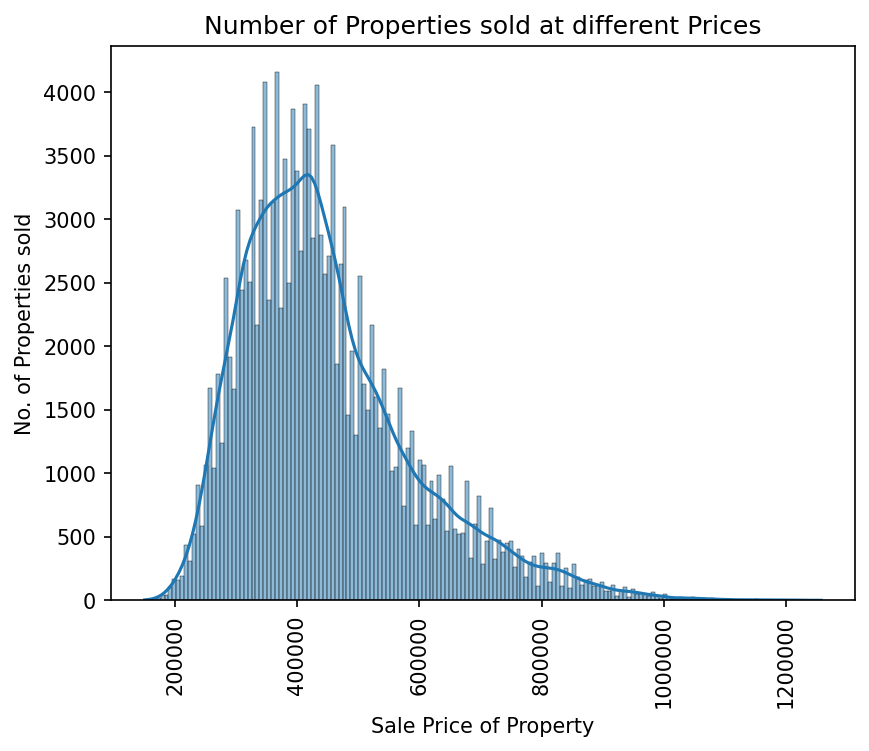

In [ ]:
plt.figure(dpi=150)
sns.histplot(data=final_df,x='resale_price',kde=True)
plt.xlabel('Sale Price of Property')
plt.xticks(rotation=90)
plt.ylabel('No. of Properties sold')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Number of Properties sold at different Prices');

From the histplot, we can see that the target variable resale_price is slightly right-skewed, which makes sense as there are probably some extremely expensive houses included in the price. This would also suggest that there are outliers in this dataset.

In [99]:
final_df.corr(numeric_only=True)['resale_price'].sort_values(ascending=False)

resale_price                 1.000000
floor_area_sqm               0.654120
id                           0.521504
max_floor_lvl                0.495650
5room_sold                   0.359434
year_completed               0.353698
upper                        0.353552
mid                          0.353213
lower                        0.352466
lease_commence_date          0.350337
exec_sold                    0.337500
Hawker_Within_2km            0.183168
sec_sch_longitude            0.108911
Mall_Within_2km              0.108648
pri_sch_longitude            0.106681
Longitude                    0.106596
mrt_longitude                0.106506
bus_stop_longitude           0.106394
sec_sch_nearest_dist         0.095339
4room_sold                   0.092600
Hawker_Within_1km            0.090516
Mall_Within_500m             0.085151
Mall_Within_1km              0.078815
mrt_interchange              0.066413
studio_apartment_sold        0.040312
multigen_sold                0.037406
cutoff_point

Checking the correlation values of the numeric columns against the target variable. From this we can see that there are features with moderate to high correlation against the target variable.

Also note that I will need to remove the id column before creating my X and y as the id is simply an index, not a feature.

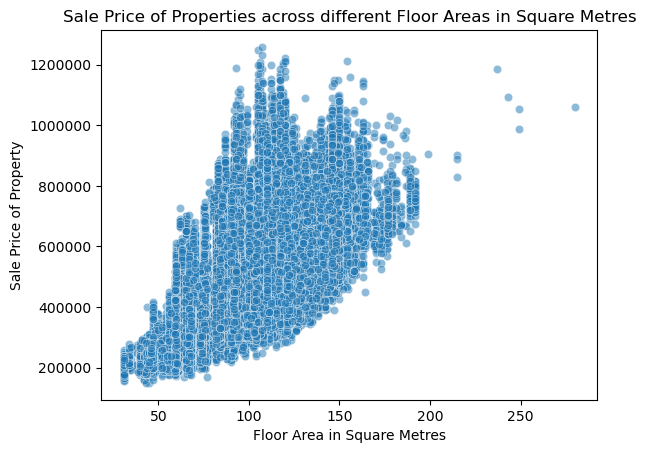

In [100]:
plt.figure(dpi=100)
sns.scatterplot(x = 'floor_area_sqm', y = 'resale_price',data=final_df,alpha = 0.5)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Floor Area in Square Metres')
plt.ylabel('Sale Price of Property')
plt.title('Sale Price of Properties across different Floor Areas in Square Metres');

For the highest correlated variable floor_area_sqm, we can see from the graph that there is indeed a positive relationship between the variables.

As expected, I can also see that there are some outliers from the graph, the points which are above 200 sqm and price above 0.9. I will leave the outliers in for now, but I now know that after fitting the initial baseline model, I can come back to remove outliers to potentially improve model performance. 

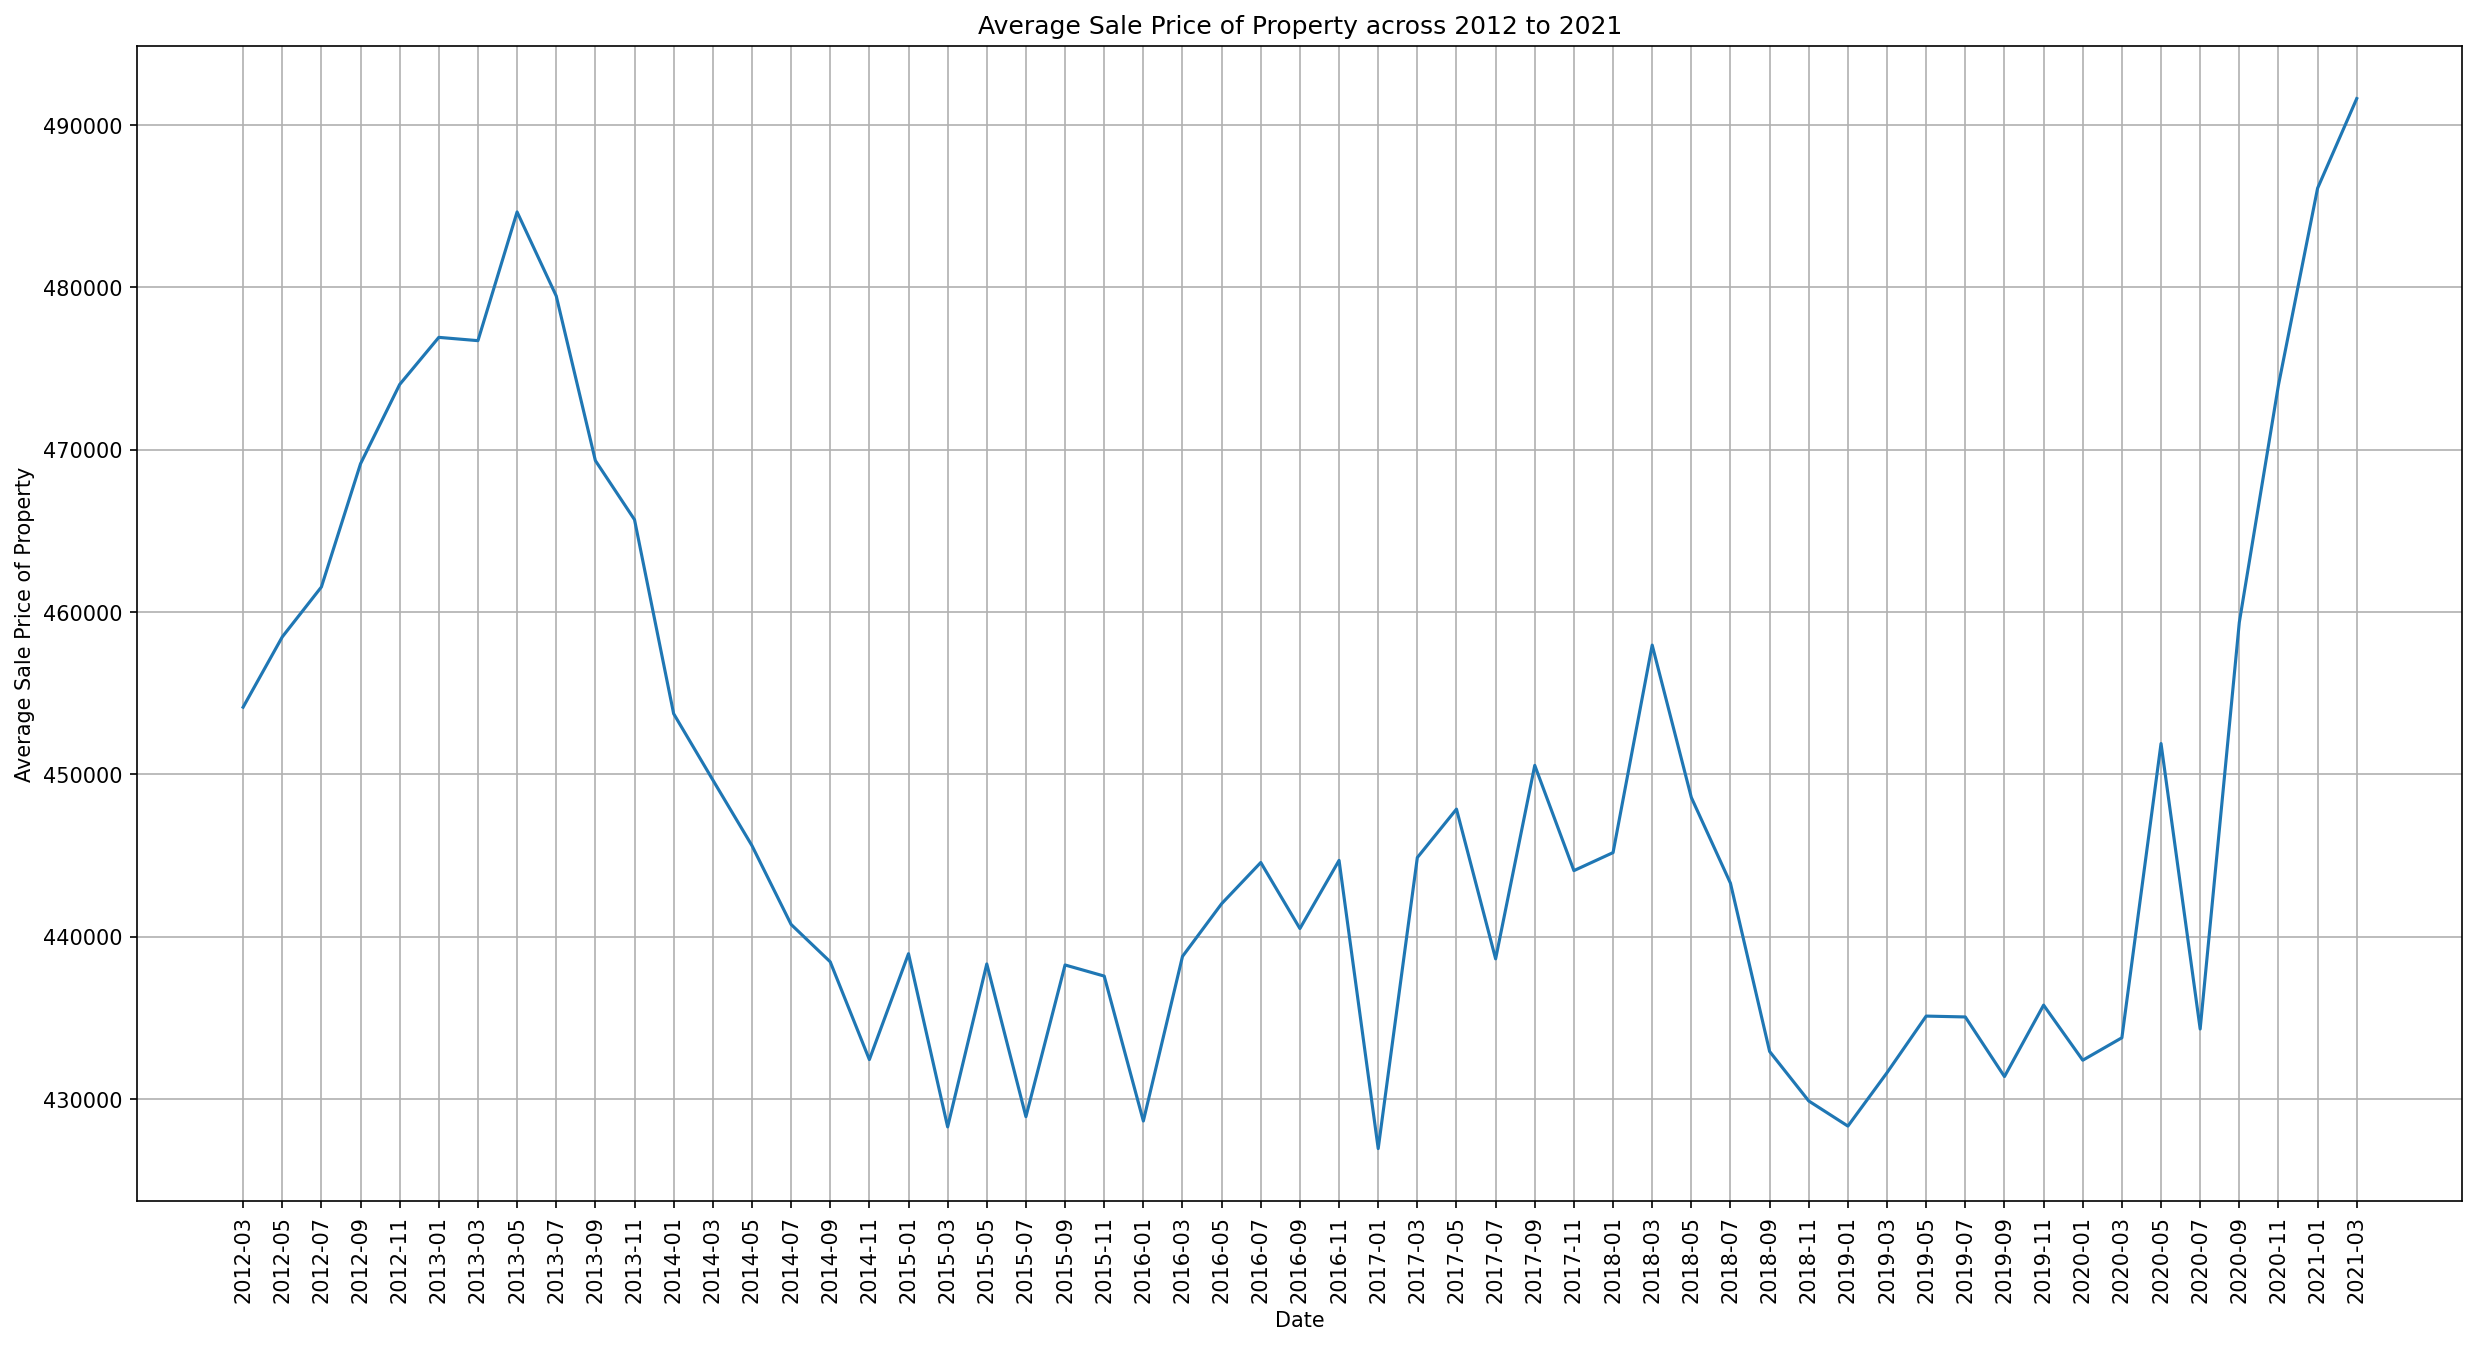

In [ ]:
plt.figure(figsize=(20,10),dpi =150)
sns.lineplot(x=df['Tranc_YearMonth'].sort_values().unique()[::2], y = df.groupby('Tranc_YearMonth').mean(numeric_only=True)['resale_price'].values[::2])
plt.grid()
plt.xlabel('Date')
plt.ylabel('Average Sale Price of Property')
plt.title('Average Sale Price of Property across 2012 to 2021')
plt.xticks(rotation = 90);

From the lineplot, we can also see that there are two periods where the prices of properties spiked or dipped greatly (i.e. 2013 - 2014, and 2020 to 2021).

The dip in year 2013 - 2014 was due to the government implementing numerous cooling measures, and the spike in 2020 - 2021 is due to the effects of COVID.

I can consider removing these outlier years after seeing the results of the baseline model.

https://www.cnbc.com/2014/01/15/singapore-home-sales-collapse-as-cooling-measures-bite.html

In [ ]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   town                 150634 non-null  object
 1   flat_type            150634 non-null  object
 2   storey_range         150634 non-null  object
 3   flat_model           150634 non-null  object
 4   commercial           150634 non-null  object
 5   market_hawker        150634 non-null  object
 6   multistorey_carpark  150634 non-null  object
 7   precinct_pavilion    150634 non-null  object
 8   mrt_name             150634 non-null  object
dtypes: object(9)
memory usage: 10.3+ MB


Next I will do some data visualisation on the object columns.

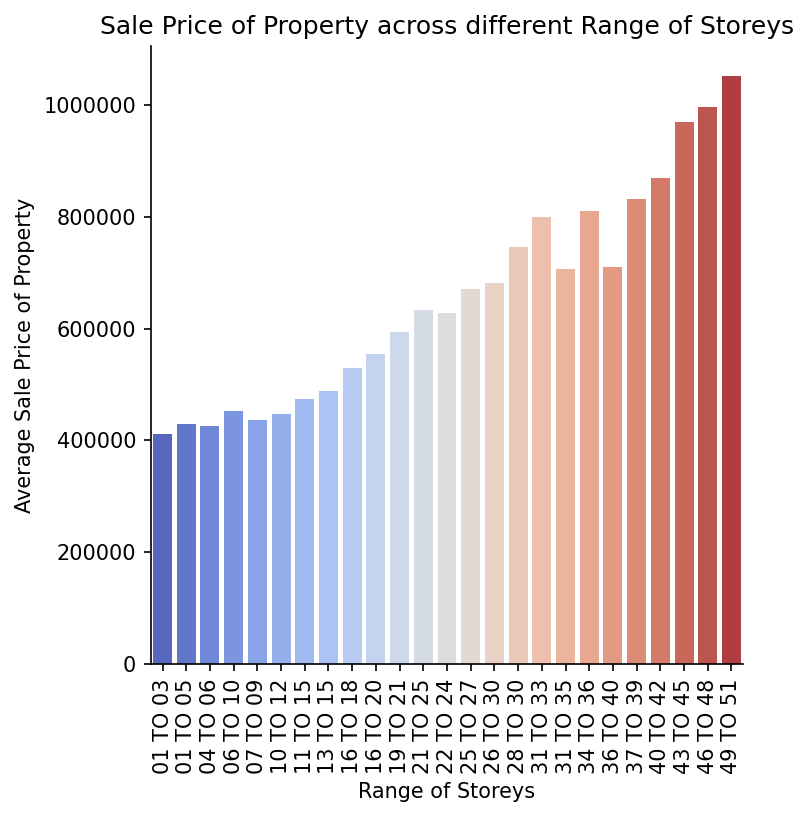

In [ ]:
fig = sns.catplot(x='storey_range', y="resale_price", data=final_df.sort_values(by='storey_range'), kind="bar",errorbar=None,palette='coolwarm')
fig.fig.set_dpi(150)
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Range of Storeys')
plt.ylabel('Average Sale Price of Property')
plt.title('Sale Price of Property across different Range of Storeys');

From the catplot we can see that there is a correlation between range of storeys the property is located on and resale price. Generally a property on a higher storey has a higher price.

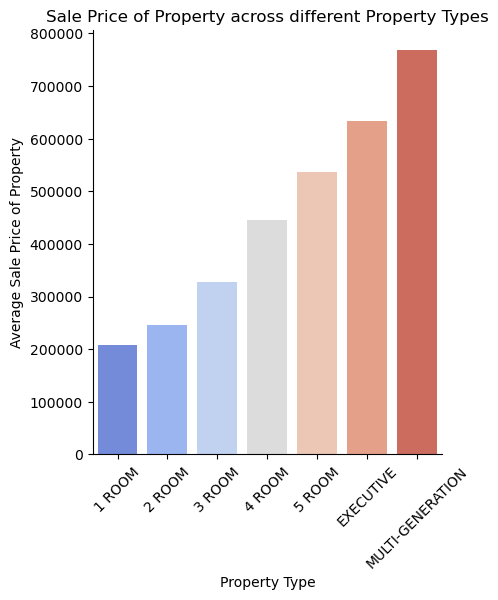

In [ ]:
fig = sns.catplot(x='flat_type', y="resale_price", data=final_df.sort_values(by='flat_type'), kind="bar",errorbar=None,palette ='coolwarm')
fig.fig.set_dpi(100)
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Property Type')
plt.ylabel('Average Sale Price of Property')
plt.title('Sale Price of Property across different Property Types');

Similarly, from this catplot, we can see that there is correlation between flat type and resale price, which makes sense as obviously a smaller flat would cost less than a larger flat all other features remaining constant.

Through these plots, it is likely that the features we have will be able to give a good prediction of the resale price.

This is the end of this code notebook, in the next code notebook, I will be doing preprocessing on the data, and running the baseline model.